<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/hospital_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

07.12<BR>
hospital EDA

# 1. 패키지 및 데이터 로드

In [1]:
system("gdown --id 1fW-c6QeKD39JKGJYc_M9JI0wiNBkbQFC")

In [2]:
df= read.csv("hospital.csv")

In [3]:
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
install.packages("DataExplorer")
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [5]:
install.packages("skimr")
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
str(df)

'data.frame':	49674 obs. of  4 variables:
 $ back_hospital.yyyymmdd : int  20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 ...
 $ back_hospital.area     : chr  "강원" "강원" "경기" "경기" ...
 $ back_hospital.sex      : int  1 2 1 2 1 2 1 2 1 2 ...
 $ back_hospital.frequency: int  3 3 4 5 2 1 6 1 0 2 ...


In [7]:
glimpse(df)

Rows: 49,674
Columns: 4
$ back_hospital.yyyymmdd  <int> 20120101, 20120101, 20120101, 20120101, 201201…
$ back_hospital.area      <chr> "강원", "강원", "경기", "경기", "경남", "경남"…
$ back_hospital.sex       <int> 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2…
$ back_hospital.frequency <int> 3, 3, 4, 5, 2, 1, 6, 1, 0, 2, 1, 0, 4, 1, 3, 6…


In [8]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             49674 
Number of columns          4     
_______________________          
Column type frequency:           
  character                1     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 back_hospital.area         0             1   2   2     0       17          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable           n_missing complete_rate        mean        sd       p0
1 back_hospital.yyyymmdd          0             1 20135658.   11189.    20120101
2 back_hospital.sex               0             1        1.5      0.500        1
3 back_hospital.frequency         0             1     

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [9]:
duplicated(df) %>% sum # 중복없음

[1] 0

1. 4개의 변수는 총 49674(약5만개)의 관측치를 가지고 있음
2. 그 중 타겟(`frequency`)를 제외한 3개 변수는 모두 범주형임.
3. `yyyymmdd` 날짜,`area` 지역(도단위), `sex` 성별
4. `sex`의 mean과 Median을 봤을때 매우 밸런스함
5. 타겟은 min=0, max=13, mean=1.42, Median=1.5 -> 회귀 모델시 로그변환 필요
6. 중복 없음 

### 검증 데이터셋에 맞춰 변수명 변경

In [10]:
require(stringr)

Loading required package: stringr



In [11]:
"back_hospital." %>% nchar ->nchar

In [12]:
names(df)= str_sub(names(df),nchar+1)

In [13]:
df %>% head # 확인

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<int>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


In [14]:
write.csv(df, "hospital_rename.csv", row.names=FALSE) 

# 1. BASIC EDA

In [15]:
introduce(df) %>% str

'data.frame':	1 obs. of  9 variables:
 $ rows                : int 49674
 $ columns             : int 4
 $ discrete_columns    : int 1
 $ continuous_columns  : int 3
 $ all_missing_columns : int 0
 $ total_missing_values: int 0
 $ complete_rows       : int 49674
 $ total_observations  : int 198696
 $ memory_usage        : num 996168
 - attr(*, ".internal.selfref")=<externalptr> 


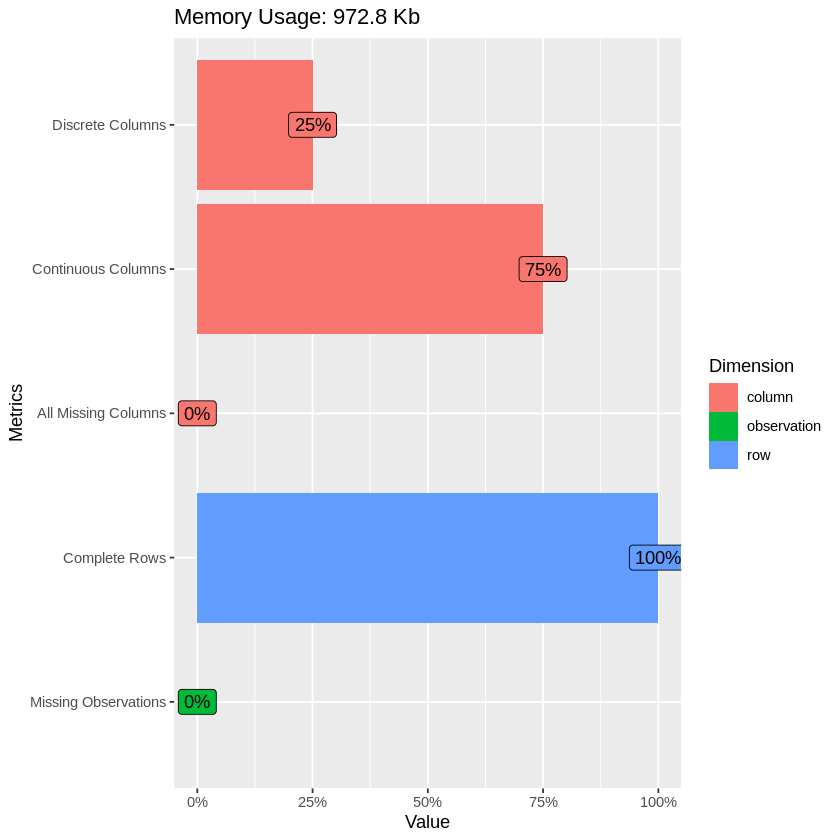

In [16]:
plot_intro(df) # 미씽 없음 

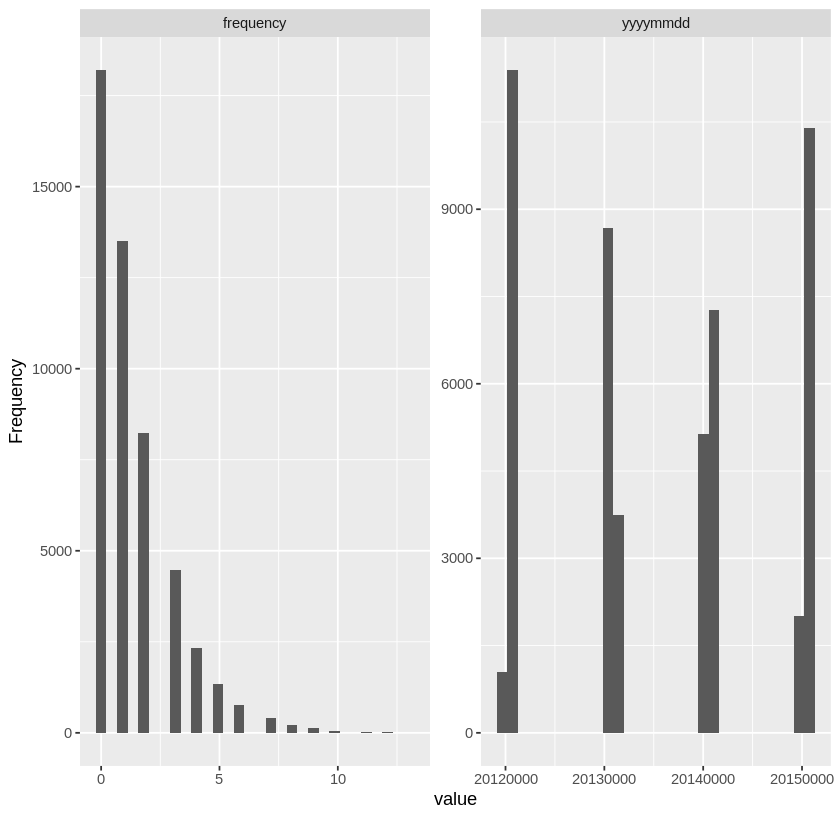

In [18]:
plot_histogram(df)

앞서 확인한 것과 마찬가지로 0의 빈도가 가장 많음

In [115]:
#df%>% mutate(frequency=as.factor(frequency)) -> df_target_factor
#df%>% mutate(frequency=as.character(frequency)) -> df_target_char

In [100]:
#head(df_target_factor)

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<fct>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


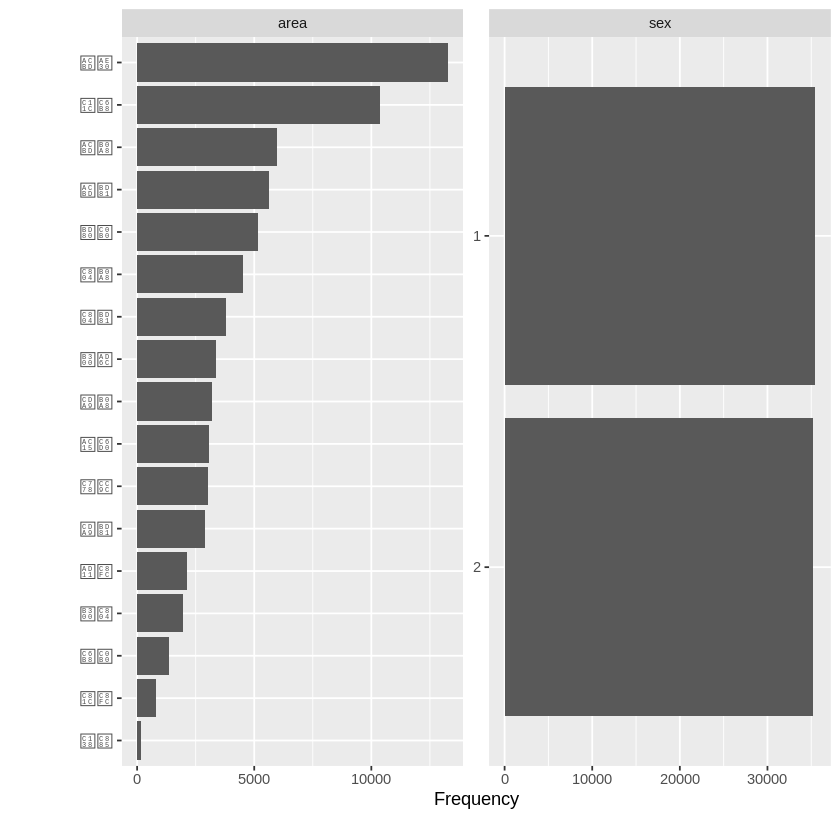

In [19]:
plot_bar(df, with='frequency')

In [89]:
table(df$ sex)
table(df$ area)


    1     2 
24837 24837 


강원 경기 경남 경북 광주 대구 대전 부산 서울 세종 울산 인천 전남 전북 제주 충남 
2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 
충북 
2922 

In [91]:
table(df$frequency)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
18197 13513  8231  4467  2321  1347   756   395   222   132    58    20    10 
   13 
    5 

In [22]:
df %>% group_by(area) %>% 
       summarise(sum_freq=sum(frequency)) %>%
       arrange(-sum_freq)

area,sum_freq
<chr>,<int>
경기,13267
서울,10354
경남,5979
경북,5614
부산,5146
전남,4532
전북,3808
대구,3363
충남,3194


비율을 알아야함. 이거만 봐선 모르겠음

성별은 상관 없어 보임

In [45]:
df %>% group_by(area) %>% 
       mutate(area_freq= sum(frequency)) -> df_area

In [46]:
df %>% group_by(area, sex) %>% 
       mutate(area_sex_freq= sum(frequency))  -> df_area_sex

In [58]:
?vapply

In [ ]:
function{
  ifelse( x==x ,  


}

In [62]:
require(data.table)

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [69]:
inner_join(df_area, df_area_sex) %>% mutate(prop=area_sex_freq/area_freq *100) %>%
  select(area, prop)  %>% transpose() 

Joining, by = c("yyyymmdd", "area", "sex", "frequency")


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V49665,V49666,V49667,V49668,V49669,V49670,V49671,V49672,V49673,V49674
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
강원,강원,경기,경기,경남,경남,경북,경북,광주,광주,⋯,전남,전남,전북,전북,제주,제주,충남,충남,충북,충북
53.3398501140437,46.6601498859563,50.9534936308133,49.0465063691867,48.6034453922061,51.3965546077939,49.4299964374777,50.5700035625223,44.9152542372881,55.0847457627119,⋯,46.1606354810238,53.8393645189762,44.8792016806723,55.1207983193277,51.8238993710692,48.1761006289308,50.9705698184095,49.0294301815905,51.1740331491713,48.8259668508287


이상 태블로로 확인함

In [ ]:
시간에 따라서 빈도 어떻게 발생하는지
지역에 따라서 빈도 어떻게 발생하는지
